# Visualization Using R and Ggplot2

Contributor:
+ Raul Eulogio

For this really quick tutorial, we will look at the intuition when using the popular visual package **ggplot2** with in **RStudio** (although I will be using the **Jupyter Notebook** interface, I highly encourage to stick to the **Rstudio** interface since that's the most useful way to using **R**). 

Deriving inspiration from the book *The Grammar of Graphics*, my bias comes from the inuitive process when going about creating effective and poignant visuals when first starting off as a struggling Data Scientist or really anything having to do with Data Analysis. 

I will try to quickly go over the different methods one can use when employing the **ggplot2** package and the different ways you can make your graphs stand out for reporting both in a educational and professional setting. 

## Loading Packages
Typically if you're starting an **R** session, you will load your packages at the start of your script. Here we are employing these packages:

- ggplot2 - The visualization package this tutorial will go in depth
- plotly - An open source interactive visuals tool that adds (imo) that extra mile for reporting when done correctly
- data.table - An extension of the **data frame** which I favor and use extensively when doing analysis in **R**
- ISLR - Package that contains data sets used in the book *Introduction to Statistical Learning with Applications in R*, here we will be using the *Auto* data set

Before we begin if you have not installed these packages into your machine you will be shown an error that appears as such:

    Error in require(ggplot2): there is no package called 'ggplot2'
    
If you get this error that means you have not downloaded the 3rd party package into your computer. So what you need to do before starting is use the following command for every package you haven't installed. And remember you only install the package once, then its already in your machine you simply have to tell **Rstudio** that you plan on using it in that session by doing `require(___)`

    install.packages('ggplot2')
    
Once that has download then running the commands below should make these packages available for your session. 

In [1]:
require(ggplot2)
require(plotly)
require(data.table)
require(stats)
require(ISLR)

Loading required package: ggplot2
Loading required package: plotly

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout

Loading required package: data.table
Loading required package: ISLR


The data set we want to use is called `Auto` so we use the `data` function to call up that data set as such:

In [2]:
data(Auto)

## Converting to Data Table Structure
So now we have our data set available for analysis, but I personally enjoy the **data.table** package because it has extended functionalities than that of the base **data.frame** (**data.frame** is the default structure for our data). And handles similar to the `pandas` function in **Python** (which will make it easier for you to switch over when you want to start learning **Python** for data analysis).

So the next step is converting our **data.frame** to **data.table** as such and change the name to `Auto_dt`. This is a common notation when creating and naming **data frames**, where we avoid spaces (' ') and periods ('.') within the name we assign and give indication with the usage of dt that we converted it to a **data table**.  

In [3]:
Auto_dt <- data.table(Auto) 

A quick and useful tool to get a glimpse of your data set is the function `head` this function gives you the first 6 observations for your **data frame**. You can also use the function `tail` which will do a similar thing except it will give you the *last* 6 values. 

One can also use view the data set by calling it as such:

    Auto_dt

but if you have a large data set you will see that it all won't fit in the **Rstudio** console so it is better to get a glimpse of your data set.

In [4]:
head(Auto_dt)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500


## Understanding Data Frames

Before we dive in, we have to understand the structure of data frames if you're not too familiar with them. 

A data frame is a tabular structure that is commonly used when first starting off learning Data Analysis. They can be thought of as matrices that values that share relationships row-wise and column-wise.

### Rows and Columns in Data Frames

#### Rows
Let's first look at the significance of rows in a data frame, here we look at one instance of our data set by calling up the 2nd row as such:

In [5]:
Auto_dt[2] # [i] where i is the index for the row
# The biggest difference between Python and R is that R starts its index at 1 while Python starts at 0!

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
15,8,350,165,3693,11.5,70,1,buick skylark 320


What do you see here? You see different physical attributes for the **Buick Skylark 320**. 

So this should show the relationship rows have with each other; they're a uniform set of attributes for the relational data set we are using. Each row in our data set is a car and its 8 physical attributes. 

## Columns
Now that you understand the significance of rows, columns should be intuitive in understanding. So let's call up a specific column and try to make sense of it. Again we are using indexing to manipulate what we want from that **data frame**.

We call up the column we want using the following syntax. 
**Note**: With the newest development version they have made this much easier but I will leave it with the most recent **data.table** version.

In [6]:
head(Auto_dt[, 1, with = FALSE])

mpg
18
15
18
16
17
15


So here we see the miles per gallon for every car that is in our data set. When going about doing Exploratory Analyis we can often see how a single column relates to itself, this is important for future use when we are going to run models. 

Here is where the tutorial begins with respect to visualizing data. I just wanted a quick run through of how data frames work to give some context when visualizing data with respect to **ggplot2**.

# Exploratory Analysis

An important step for many beginning Data Analyst and Data Scientist, is data exploration using visuals. This is a powerful tool used to give both the user and the reader a basic understanding of the data, the user is employing in their analysis. And can be a useful way to get someone who doesn't have a strong analytical background be interested in your project, people love appealing visuals that helps them understand data in a way that we often take for granted. 

The reason we went over data frames earlier was because we are going to use **ggplot2** with the instrinic relationships the columns and rows have. 

# Ggplot2 

The reason I enjoy using **ggplot2** as opposed to the base graphics in **Rstudio** is because you have freedom to create a visual that is very unique to your personal preference of how your data will look. 

Before we begin, I'll try to paint a picture of how **ggplot2** works for myself. Obviously there are many sources that will have a better understanding and process of explantion, but I will try to teach in a way that is digestable. 


## Setting up your Canvas

I understand **ggplot2** as an online tool where we are given a blank canvas where we add layers of our 'art'. But before we start adding our paints and canvas structure, we have to have a subject!

The subject obviously is our data set, but we are creating seperate pieces that all relate to each other. I draw parallels to the **Impressionism** art movement when creating data visualizations. The artist **Claude Monet** did something revoluntionary in that he created series of painting all relating to the same subject except from different perspectives, seasons, and time of day. A quick google search of **Claude Monet Wheatstacks** will show what I mean. There are different dimensions to the scenery and theme (something not employed by artistic movements until the revolution of **Impressionism**), which holds true for our data as well. 

So when we start understanding the way we can see relationships within our data set, we can in the long run make stronger analytical inferences as to which models and algorithms will perform better on our data. 

Let's start by setting up our empty canvas and employing visuals for one of our dimensions(i.e. columns). And progress from there to multiple dimensions and customizing our canvas to fit our personal aesthetic choice. 

We start with the function `ggplot(dataFrame, aes(variables))` which gives us more control than that of the `qplot` function in **ggplot2**. 

## Structure of your Canvas

# Aesthetics

When employing the **ggplot** function you have to tell it how the variables will relate to each other with the `aes` call. In our example we told the function that our x is `mpg`, which is why when our canvas was outputted you'll see that `mpg` is our x axis. 

When we only include one parameter we are telling **ggplot** that we want to see how a dimension of our data set relates to itself. 

**Note**: that we have to know whether our variables are **Discrete** or **Continuous** so that we can employ the appropriate techniques. In our case `mpg` is continuous and one of the most common ways to visualize continuous data is through **histograms**

# Geoms

Here is where we start layering and painting our canvas using the `geom` functions. There are many `geoms` that will be useful for different scenarios. I suggest looking up the [ggplot2 Cheat Sheet](https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf) and going from there, but here we will be using the histogram geom. We create these layers in this fashion:

    ggplot(data = mpg, aes(x = mpg)) +
        geom_SHAPE(parameters)
        
# One Variable Visualization (Continuous)
To reiterate we are going to create a visual where we see the inter-relationship of a variable with itself. This highlights the differences in rows with respect to the column. We can see the distribution of the variable and make inferences based off of this plot.

## Empty Canvas
First let's set up and plot the empty canvas using the following command:

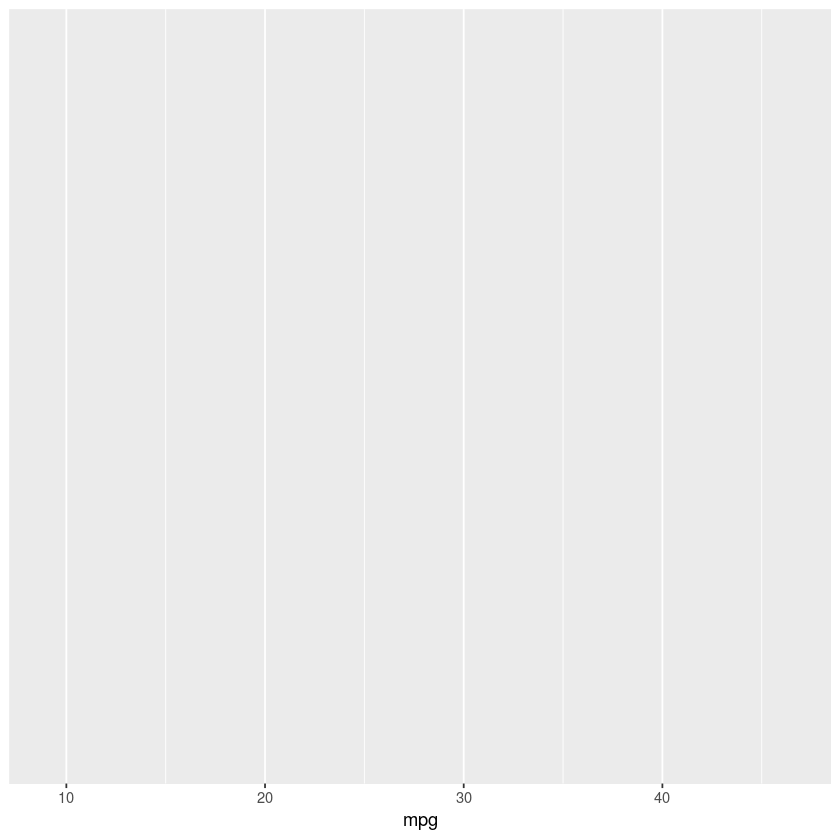

In [7]:
ggplot(data = Auto_dt, aes(x = mpg))

Notice the structure of our function, we call up our **data.table** using 

    data = Auto_dt
    
This tells the function we will be using this specific **data.table** for our 'work of art'. This is important because the function will **only** employ attributes from the **data.table**, which will give us the liberty to add different layers that will help us create more powerful visuals.

The second part:

    aes(x = mpg)
    
tells **ggplot** that we are creating aesthetic mappings that will tell the function how the data will be mapped when using the available `geoms` in **ggplot2**. Which now we will use the `geom_histogram` to create a histogram.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


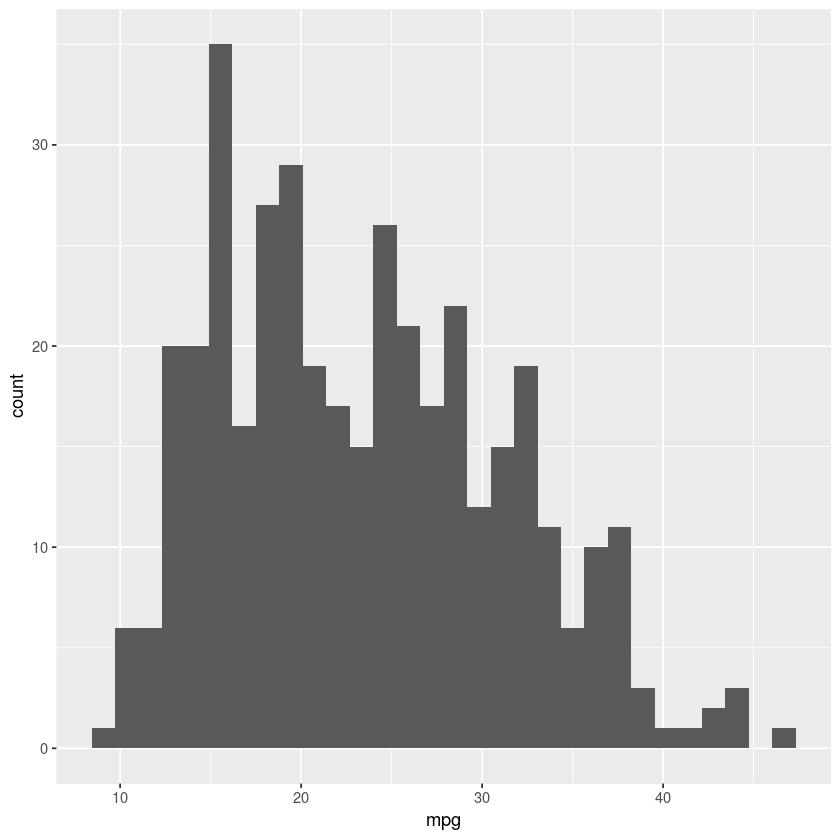

In [8]:
# Using our previous example let's add a layer over the empty canvas
ggplot(data = Auto_dt, aes(x = mpg)) +
    geom_histogram()

So now we have our first plot! 

This is a histogram showing the distribution of `mpg` for our data set. It already tells us a lot, but here is where we start iterating to create more aesthetically and analytically pleasing visuals. 

Our next step is to change the binwidth, as you see we get a warning 

    `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
  
And upon reading the docs you'll see mention of this saying

    'By default, stat_bin uses 30 bins - this is not a good default, but the idea is to get you experimenting with different binwidths. You may need to look at a few to uncover the full story behind your data.'
    
So let's experiment with binwidth sizes and adding color to our plot. A personal preference for color that I have grown accustomed to is using the color referred to as `turquoise4` so I will be employing that extensively in this tutorial.

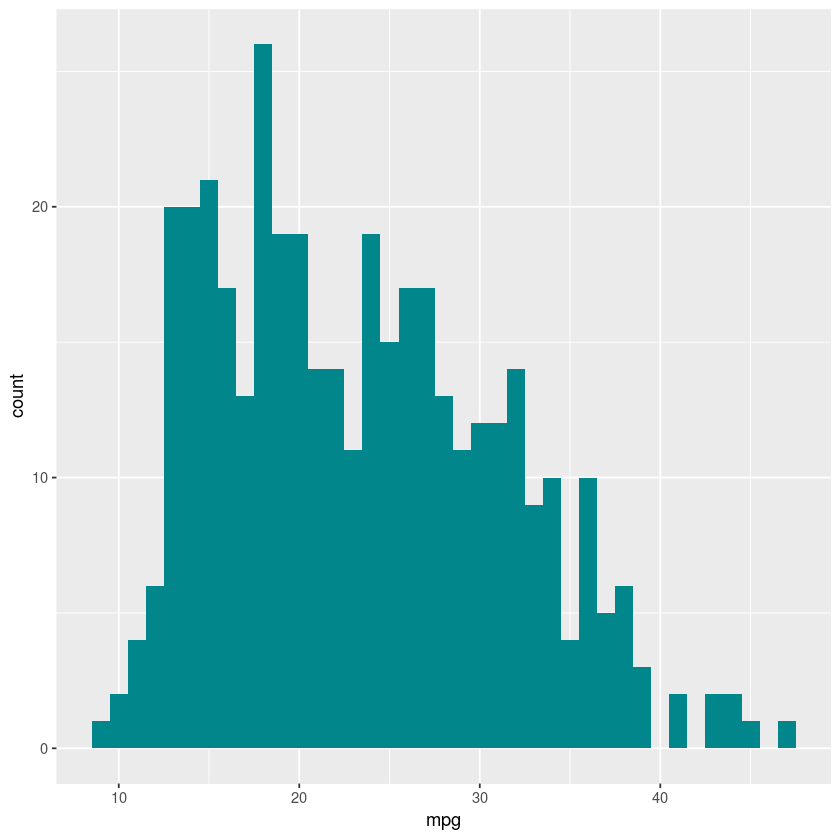

In [9]:
# Changing binwidths and adding color to our plot
ggplot(data = Auto_dt, aes(x = mpg)) +
    geom_histogram(binwidth = 1, 
                   fill = 'turquoise4')

Great! Now notice that we told the function to fill the histogram with the color `turquoise4`. We are esentially telling our paintbrush what color we want, which we have to do explicitly because the paintbrush is set to the generic (and bland) dark grey. 

Next say we want to be able to add borders around the bars of our histogram to better differentiate the different bars since some might have the same count, we might be missing some valuable insight in our graph. We do this telling the `geom_histogram` what color we want the borders as such:

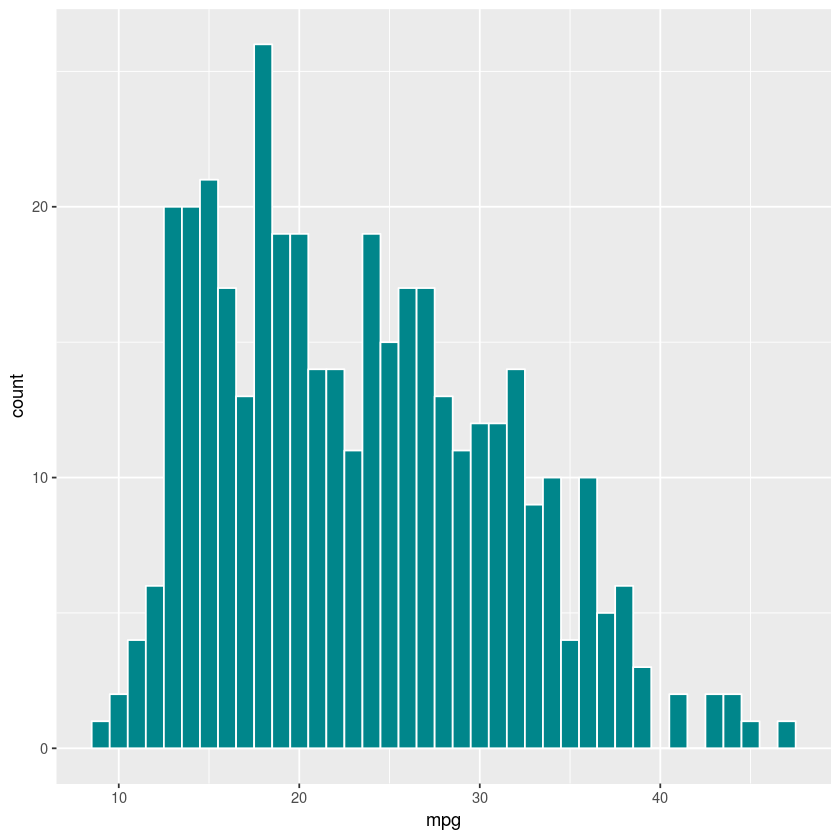

In [10]:
# Changing binwidths and adding color to our plot
ggplot(data = Auto_dt, aes(x = mpg)) +
    geom_histogram(binwidth = 1, 
                   fill = 'turquoise4', 
                   col = 'white')

A significant improvement from our original plot, but there are some minor tweaks that would really make our plot stand out. As well as a big issue that should have be addressed with every plot.

Plots are important because they have to be able to tell the story of the data, with and without the data. Plots are added to analysis but for good practice plots should be able to tell a story on their own. They have to be able to be independent and stand alone, so they should say everything within the themselves. 

And the major reason I saw this is because we don't have a title on our plot. We'll change that this iteration as well as adding better x and y labels and adding transparency to our histogram to be easier on the eyes.

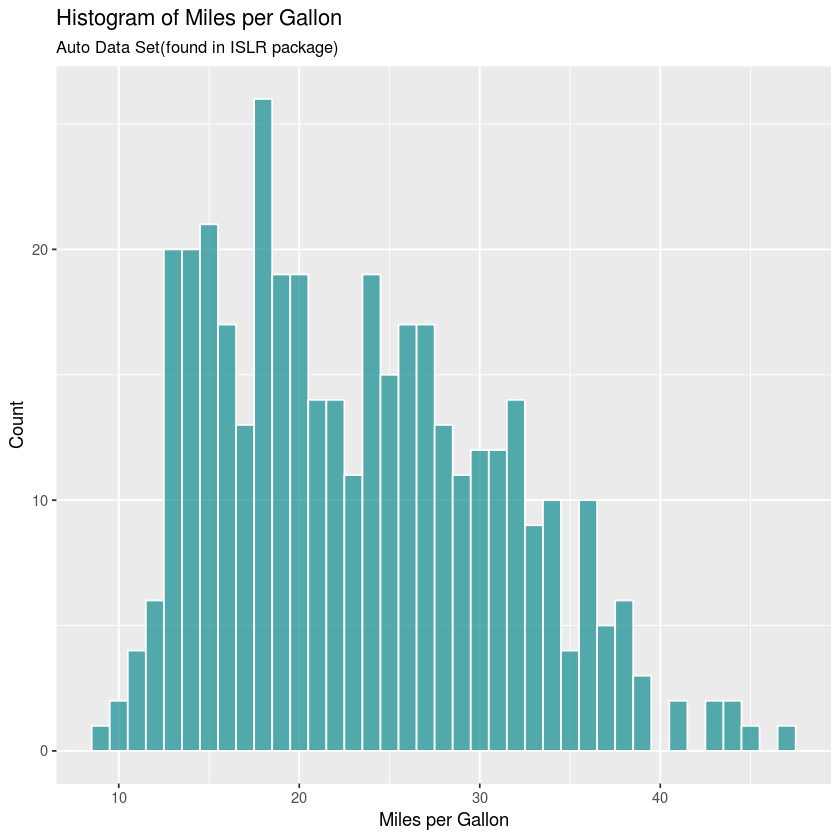

In [11]:
# Adding better labels and transparency
ggplot(data = Auto_dt, aes(x = mpg)) +
    geom_histogram(binwidth = 1, 
                   fill = 'turquoise4', 
                   col = 'white', 
                  alpha = 0.65) + 
ggtitle('Histogram of Miles per Gallon', 
        subtitle = 'Auto Data Set(found in ISLR package)') +
labs(x = 'Miles per Gallon', 
     y = 'Count')

And there you have it! A histogram showing the distribution of miles per gallon for the `Auto` data set. 

Now as the final iteration, I personally like to add a theme because I think that the default canvas (background) is ugly. I personally enjoy adding pre-built themes, my top two are `theme_bw()` and `theme_minimal()`. There are a lot of different themes available as well as having the abillity to create you own using the `theme()` function. So you can play around with these but I will use the `theme_minimal()` function.

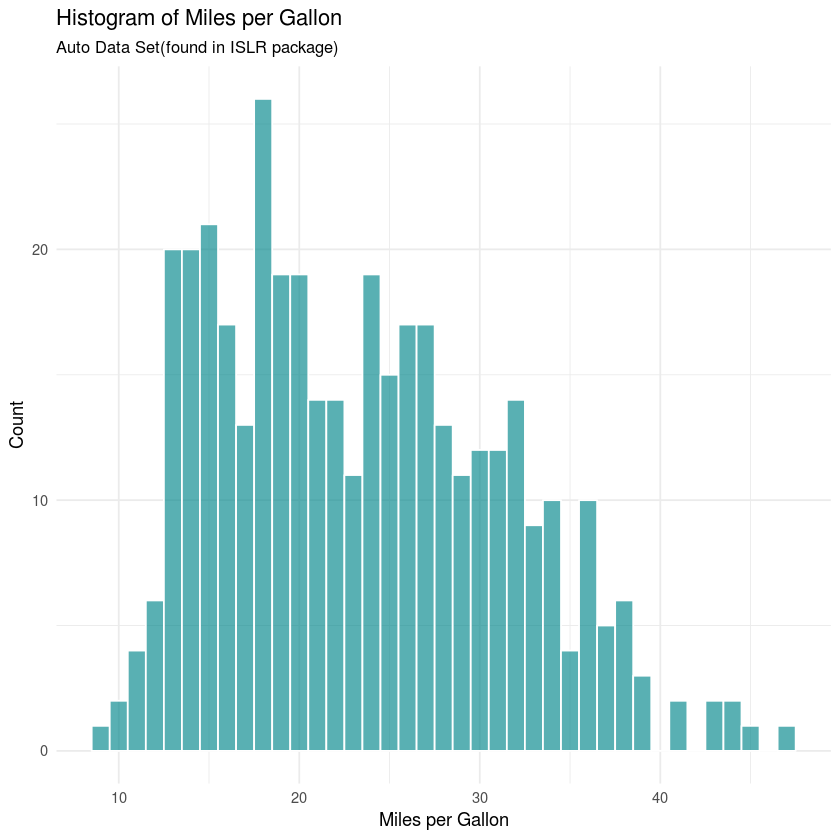

In [12]:
# Adding plot theme, in this case a minimal theme where we remove the x and y axis, ticks, etc.
ggplot(data = Auto_dt, aes(x = mpg)) +
    geom_histogram(binwidth = 1, 
                   fill = 'turquoise4', 
                   col = 'white', 
                  alpha = 0.65) + 
ggtitle('Histogram of Miles per Gallon', 
        subtitle = 'Auto Data Set(found in ISLR package)') +
labs(x = 'Miles per Gallon', 
     y = 'Count') + 
theme_minimal()

# One Variable Visualization (Discrete)

For this next demonstration, we will show the technique for **Discrete** variables. Typically we are interested in seeing how many items in our *Categorical* variable fall under the respective categories.

This is important in **Machine Learnning** and **Classification** problems because if the distribution is not balanced we face the issue of **Class imbalance** which we won't go into detail here wanted to point out the usefulness of visualizing *Categorical Data*. 

We will employ a bar graph for the `cylinder` variable, since if through looking through the data set or reading the documentation you will know that this is a *Categorical Data*. 

**Note**: Recall that since this is a *Categorical* variable we have to take that into account using `factor()` since we didn't convert the variable beforehand.

We proceed as follows.

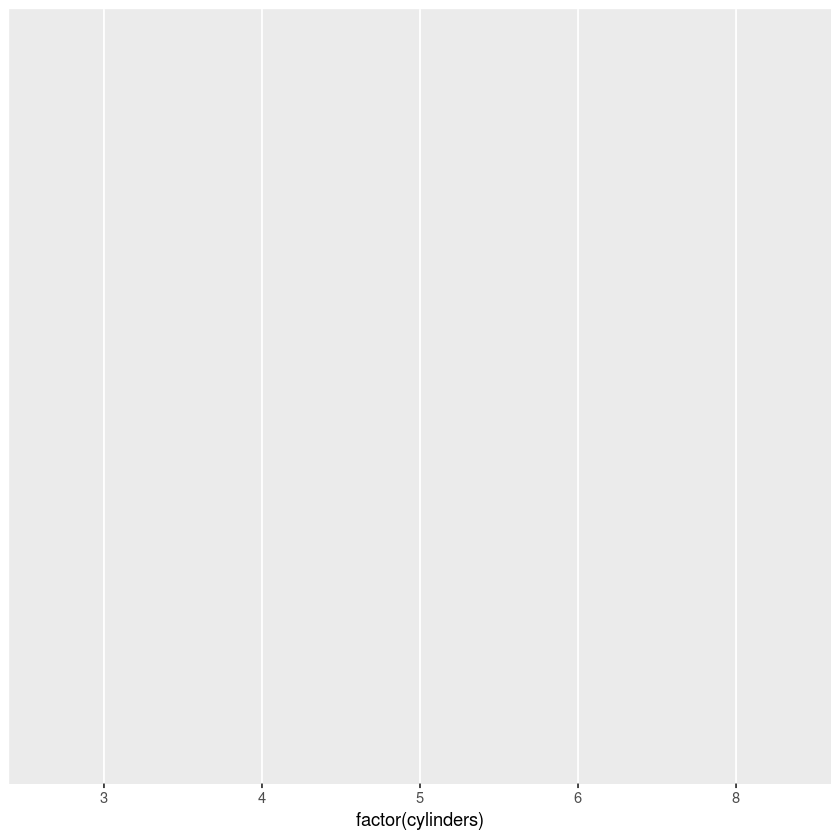

In [13]:
ggplot(data = Auto_dt, aes(factor(cylinders)))

Next we add the bars, as you see all the possible `cylinder` types are mapped out on the x axis.

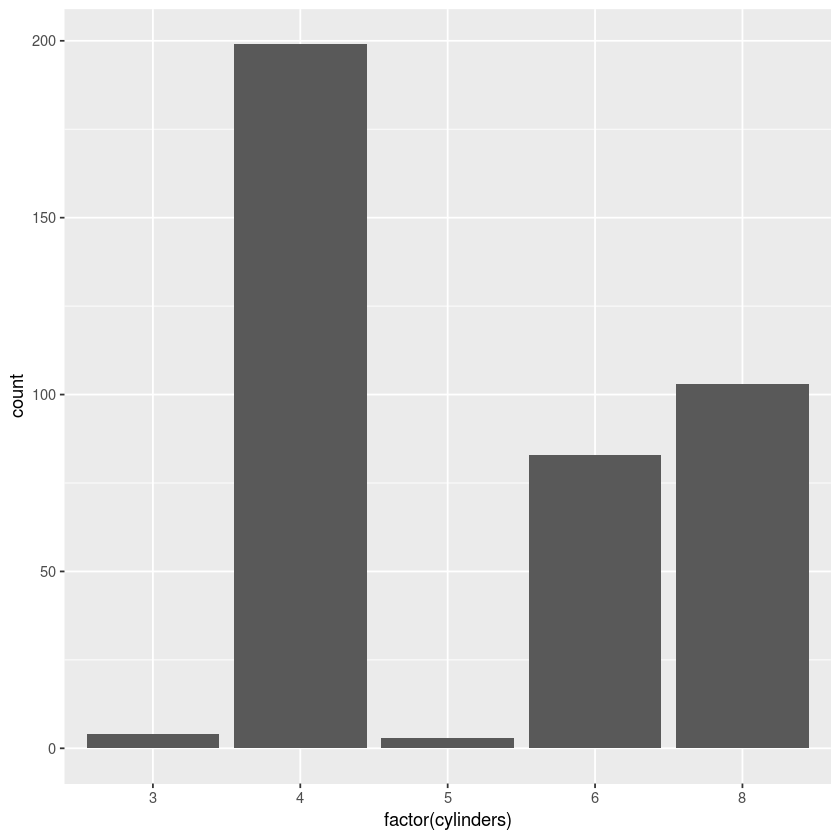

In [14]:
ggplot(data = Auto_dt, aes(factor(cylinders))) + 
geom_bar()

As we can clearly see there is some imbalance in the amount of `cyclinders` in our data set. We could have obviously produced those numbers fairly easy but a visual can help drive the point home in your analysis (Especially in **Machine Learning**) 

Now let's add more aesthetics and make our plot easy to understand.

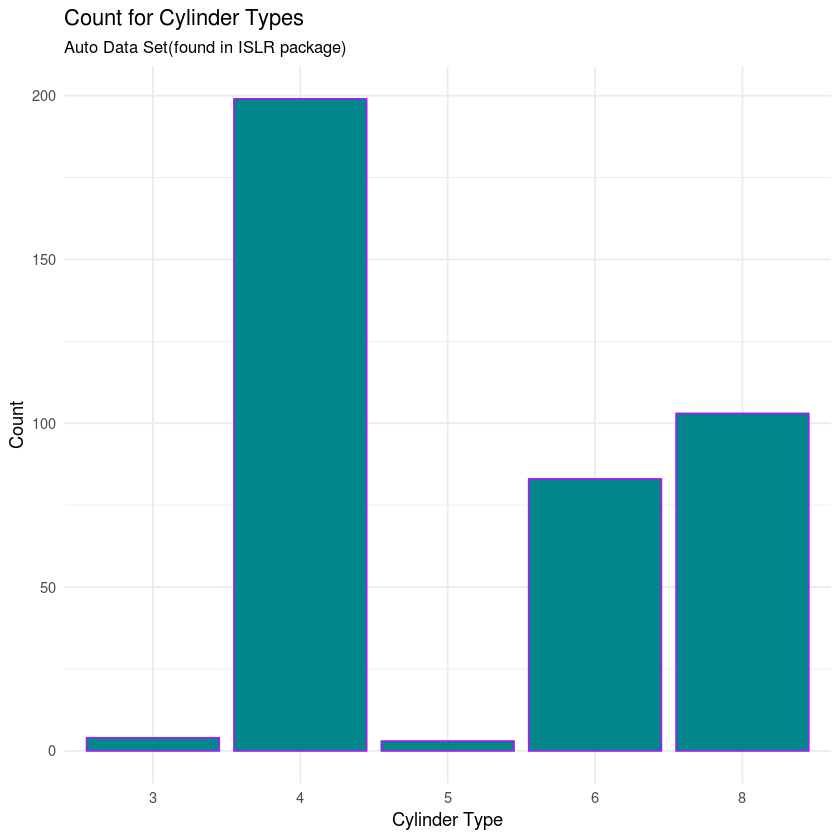

In [15]:
ggplot(data = Auto_dt, 
       aes(factor(cylinders))) + 
geom_bar(fill = 'turquoise4', 
         col = 'purple') + # Adding a border because why not
ggtitle('Count for Cylinder Types', 
        subtitle = 'Auto Data Set(found in ISLR package)') +
labs(x = 'Cylinder Type', 
     y = 'Count') + 
theme_minimal()

## Coordinate Flip

Another neat feature when doing bar charts is the ability to 'flip' our plot. 

This is useful because plots can be displayed in this way and makes as much sense as the orginal plot, and could be a personal preference for some. 

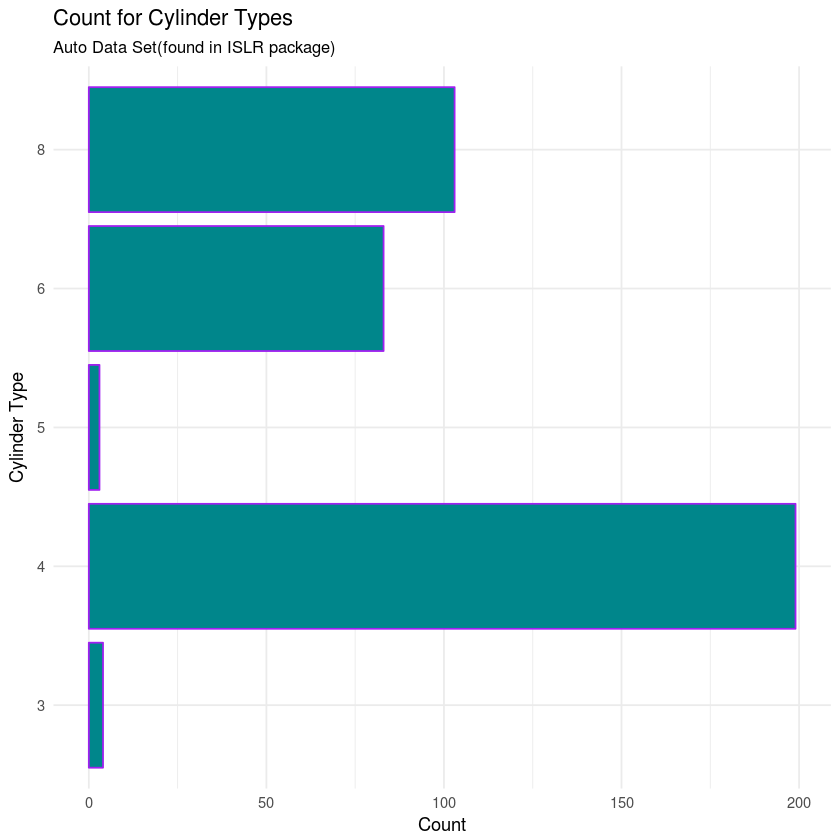

In [16]:
ggplot(data = Auto_dt, 
       aes(factor(cylinders))) + 
geom_bar(fill = 'turquoise4', 
         col = 'purple') + # Adding a border because why not
ggtitle('Count for Cylinder Types', 
        subtitle = 'Auto Data Set(found in ISLR package)') +
labs(x = 'Cylinder Type', 
     y = 'Count') + 
theme_minimal() + 
coord_flip()

## Other Methods

Here are some other useful methods that can help with seeing variable interaction within *Categorical* Visual representations. 

For the first part let's say we want to explore the relationship between `cylinders` and `origin`. So we want to see the relationship between two *Categorical* Variables, and the way we will do that is show the amount of origin within each cyclinder type.

We do this by creating an other object where in the `aes` for the `geom_bar` function we include the following:

    fill = factor(origin)
    
Then we will add some parameters to what we've done already so you can see the transformation of the visual.


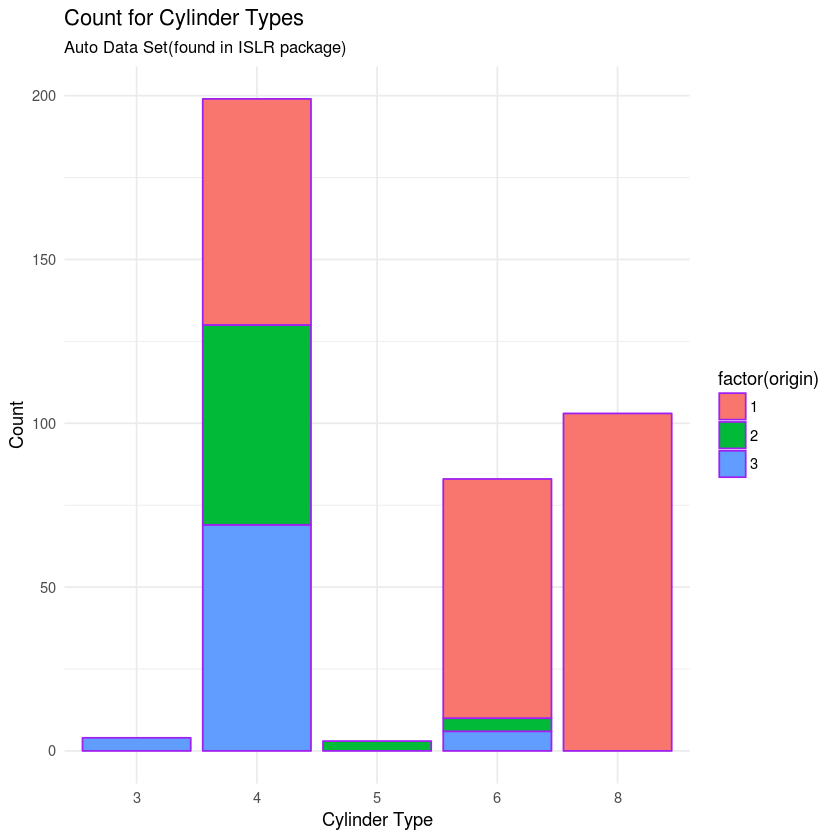

In [17]:
# We just copy pasted the original final plot we did for the previous example

ggplot(data = Auto_dt, 
       aes(factor(cylinders))) + 
geom_bar(aes(fill = factor(origin)),  # Adding distribution
        col = 'purple') + # Add purple border
ggtitle('Count for Cylinder Types', 
        subtitle = 'Auto Data Set(found in ISLR package)') +
labs(x = 'Cylinder Type', 
     y = 'Count') + 
theme_minimal()

**Context**: For `origin` 1 is American, 2 is European, and 3 is Japanese.

So this tells us a few things 
+ American cars were the predominate car types in our data set
+ that all 8 cylinder cars were made in the United States
+ cars with four cyclinders were evenly made across all 3 locations
+ 3 cylinder cars were only made in Japan
+ 5 cylinder cars were only made in Europe
+ 3 and 5 cylinder cars were the least common in our data set

## More Aesthetic Development 

So these plot types are pretty straight forward and for my final process I will manually fill the colors to my graph because I like the customization of my plots. 

We do this using the `scale_fill_manual` our own color preferences this is very useful and resources to keep note of are the understanding of some pre-designed color names made by [ggplot2](http://sape.inf.usi.ch/quick-reference/ggplot2/colour) (which is where I found 'turquoise4') and as well as understanding that **ggplot2** understands [hex color codes](http://htmlcolorcodes.com/) (used alot in **html**). 

I will employ both ways in my filling in of colors, as well as changing the legend on my plot using the `name` parameter for the same function. 

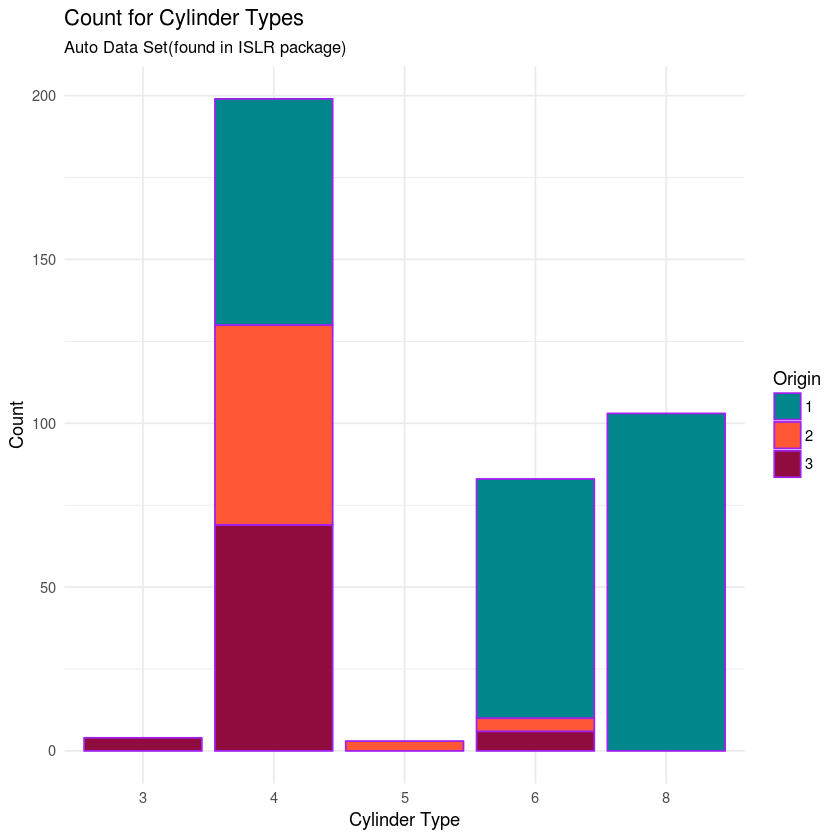

In [18]:
# Again same graph with added parameters

ggplot(data = Auto_dt, 
       aes(factor(cylinders))) + 
geom_bar(aes(fill = factor(origin)),  # Adding distribution
        col = 'purple') + # Add purple border 
ggtitle('Count for Cylinder Types', 
        subtitle = 'Auto Data Set(found in ISLR package)') +
labs(x = 'Cylinder Type', 
     y = 'Count') + 
scale_fill_manual(values = c('turquoise4', '#FF5733', '#900C3F'), # The last two are Hex Code Colors
                 name = 'Origin') +  
theme_minimal()

## Adding Legend Lables

The last thing I want to add to this plot is that if someone where to read it they would have no context as to what origin meant with respect to the numbers 1, 2, 3. 

Luckily for us there is a `labels` parameter that can allow us to change the labels on the legend within the `scale_fill_manual`.  

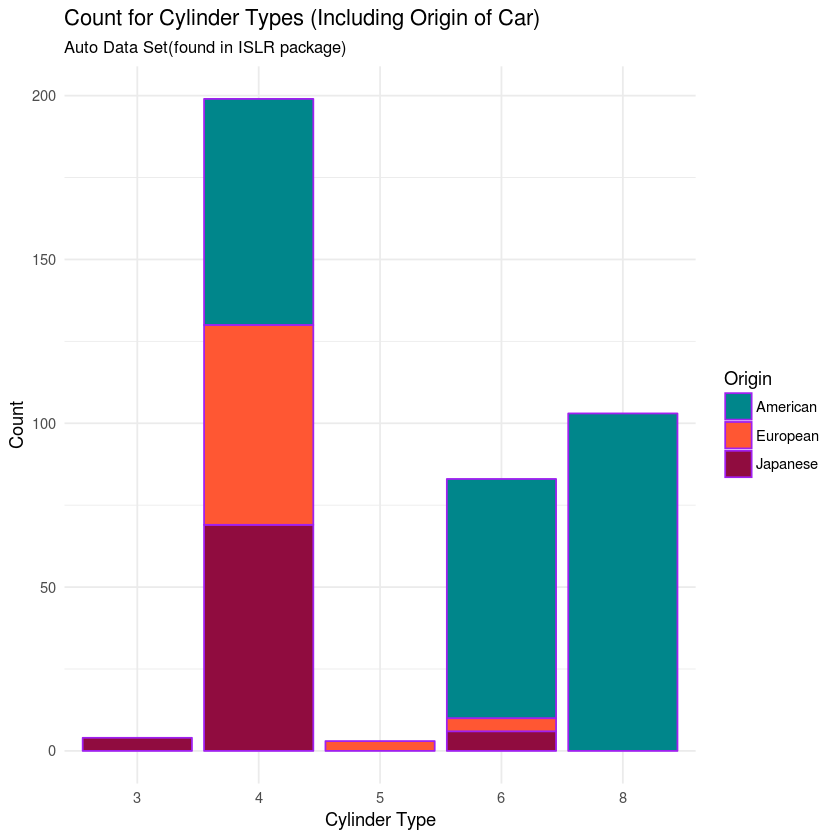

In [20]:
# Adding origin names

ggplot(data = Auto_dt, 
       aes(factor(cylinders))) + 
geom_bar(aes(fill = factor(origin)), # Adding distribution 
        col = 'purple') + 
ggtitle('Count for Cylinder Types (Including Origin of Car)', 
        subtitle = 'Auto Data Set(found in ISLR package)') +
labs(x = 'Cylinder Type', 
     y = 'Count') + 
scale_fill_manual(values = c('turquoise4', '#FF5733', '#900C3F'), # The last two are Hex Code Colors
                 name = 'Origin',
                 labels=c('American', 'European', 'Japanese')) +  
theme_minimal()

There we have a thorough look at *Categorical* variables and variable interactions. Pretty straight forward when the process becomes familar. 

# Two Variable Interactions (Continuous X, Continuous Y)

Next we start creating visuals that are somewhat more difficult but follow a similar set up as the single variable visual. 

Say just by looking at the variables, I can make the assumption that there will be a relationship between the horsepower of a car and the weight of the car. 

This would make sense; heavier cars would need more horsepower to compensate for the extra cargo. This is where visuals are important because we can either prove or disprove this assumption and draw other conclusions of the ineractions between our variables.

Here I know that the two variables are both **Continous** so we will iteratively create a scatter plot.

So we employ the same `ggplot` function and add a y aesthetic. Again starting with an empty canvas notice how the labels are the variables we input to the function.

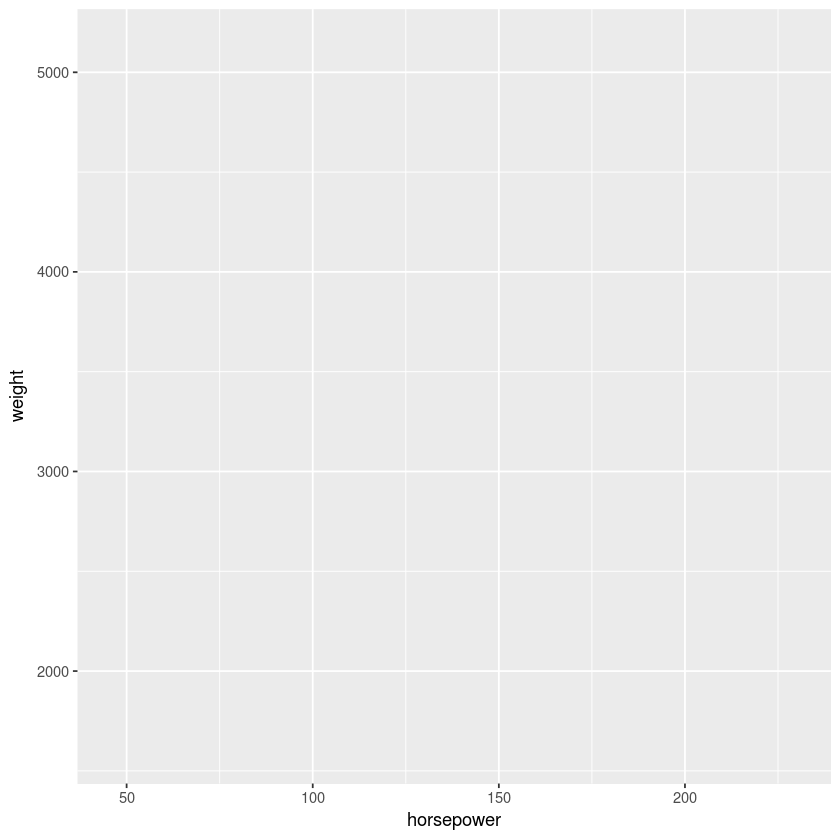

In [21]:
ggplot(data = Auto_dt, 
       aes(x = horsepower, 
           y = weight))

Let's add some points!

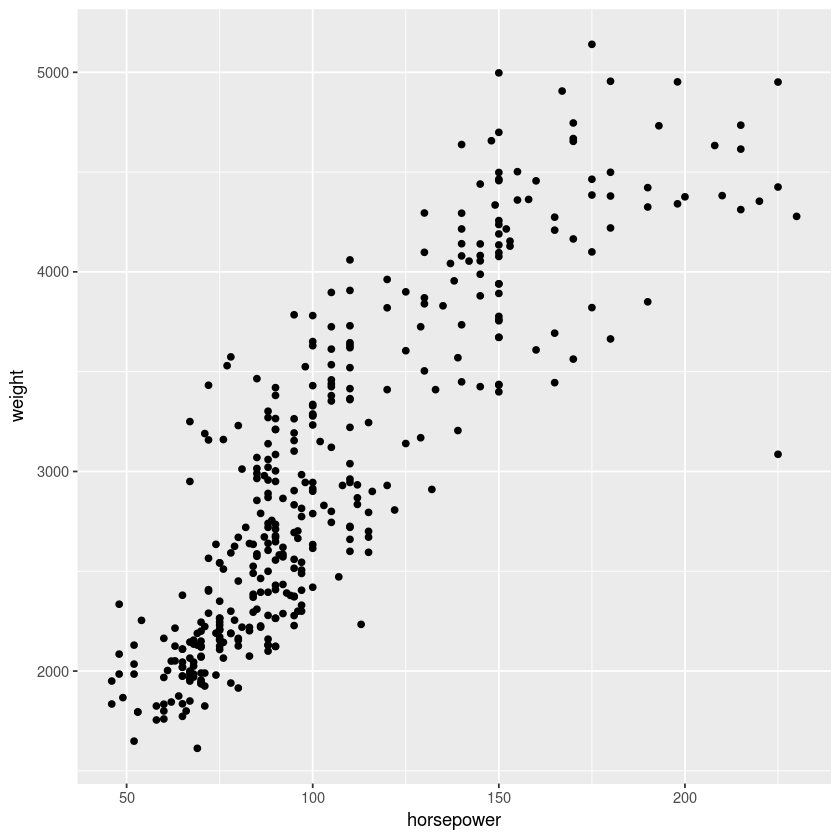

In [22]:
ggplot(data = Auto_dt, 
       aes(x = horsepower, y = weight)) +
geom_point()

Bingo! 

Here we can see there is clearly a relationship between these two variables that proves what we thought earlier, outside of a few exceptions. We can see heavier cars employ more horsepower. 

Next let's employ the same techniques I did for the first plot, and you'll notice that these processes repeat and are very intuitive.

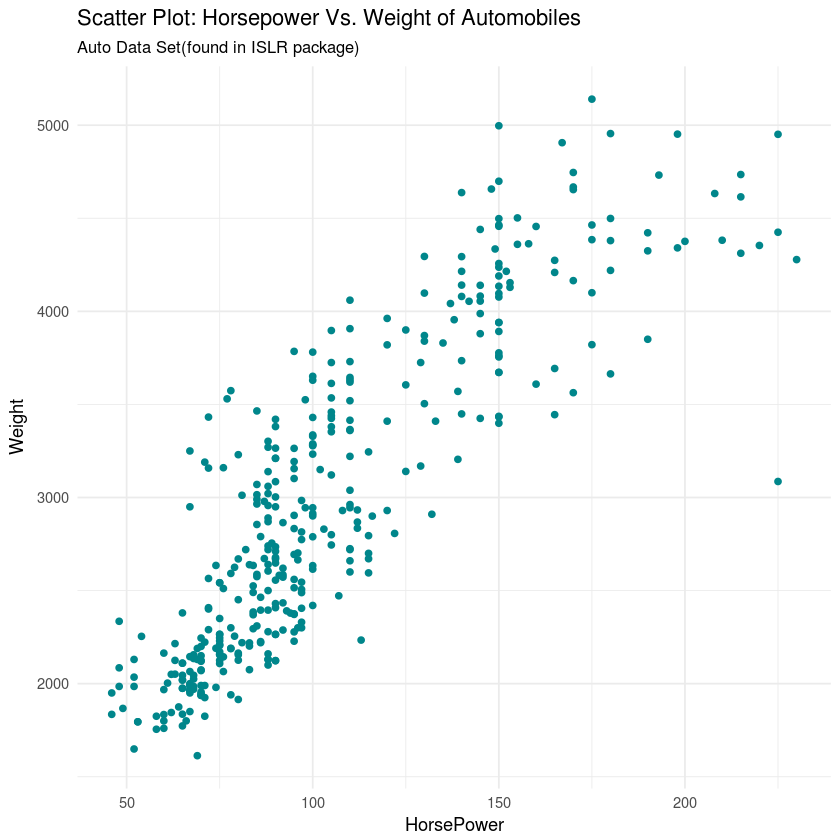

In [23]:
ggplot(data = Auto_dt, 
       aes(x = horsepower, 
           y = weight)) +
geom_point(col = 'turquoise4') + 
ggtitle('Scatter Plot: Horsepower Vs. Weight of Automobiles', 
        subtitle = 'Auto Data Set(found in ISLR package)') +
labs(x = 'HorsePower', 
     y = 'Weight') + 
theme_minimal()

From this plot we can deduce we would be able to create a simple but effective linear relatioship between these two variables. 

We can leave the plot as is or we can go into more detail which is why I believe **ggplot2** does a better job at explaining variable interactions. 

# Third Variable Interaction

So we produced a scatter plot showing the relationship between `horsepower` and `weight`, but say we have a categorical variable in our data set that we want to be able to make more connections with respect to these variables. 

This is an important aspect when it comes to **Machine Learning** and **Classification Problems**. 

For this data set, if you explored more you would see that `cylinders` and `origin` are **Discrete** variables (only able to take on certain values). So a powerful tool we can implement in **ggplot2** is adding aesthetic mappings to our scatterplot that will help us see the interaction with discrete variables!

We again employ the `aes` function except this time on our `geom_point` function. This will tell **ggplot** we want to see the `cyclinder`'s interaction as it relates to the interaction between `horsepower` and `weight`. 

**Note**: If you didn't already convert to a `factor` variable you can employ the `factor()` function in your mapping to be sure **ggplot** understands the data type of `cylinders` or else your mapping will come out completely different (since `cylinders` are `int` type **ggplot** will interpret the variable as **Continuous**).

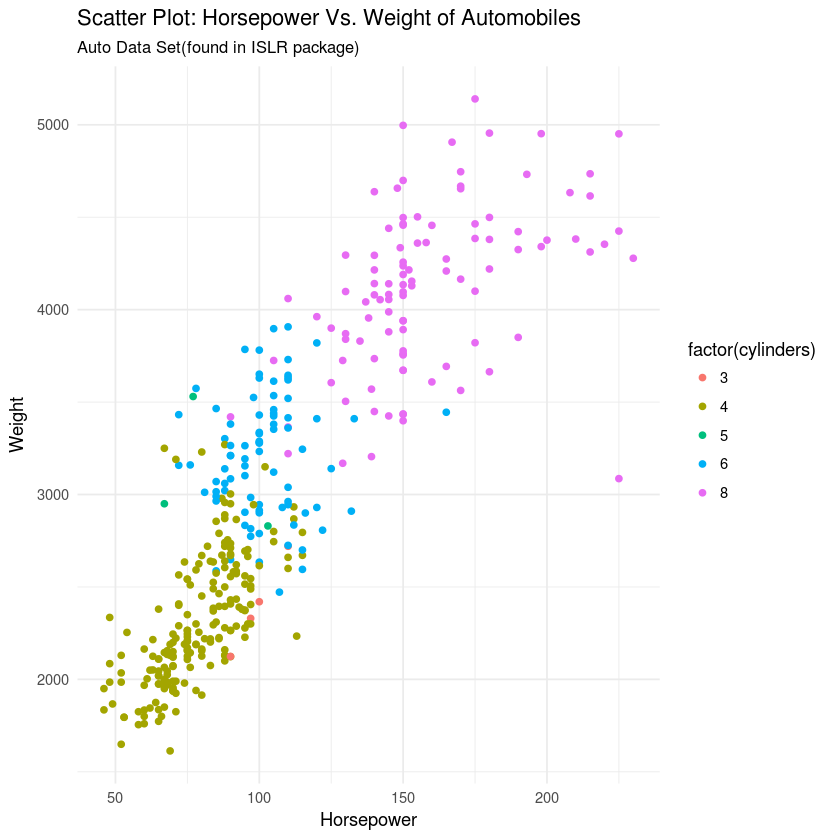

In [24]:
ggplot(data = Auto_dt, # State our data frame
       aes(x = horsepower,
           y = weight)) +  # Choose variables that we will be mapping
geom_point(aes(colour = factor(cylinders))) + # Add color with respect to the cylinder type
ggtitle('Scatter Plot: Horsepower Vs. Weight of Automobiles', # Title
        subtitle = 'Auto Data Set(found in ISLR package)') + # Subtitle to give more context
labs(x = 'Horsepower', # X label
     y = 'Weight') + # Y label
theme_minimal() # Theme usage

Now we can see a clearer relationship with respect to all three variables. An intuitive relationship that says: The the weight of the car affects the amount of horsepower **and** cylinders needed for performance. The heavier the car the more horsepower and cylinders needed. 

We can employ this method with `origin` as well and come up with interesting conclusions. I will you create this yourself using the same techniques I used, but for now we're going to move on to more interesting addition you can do to your 2 variable interaction plots. 

## Facet Wrapping

Fortunate for us we the data set doesn't have too many data points where our plot can give us a pretty good view of the seperate types of cylinders, especially for 4, 6, and 8 cylinder cars. But say we want to be able to view all these seperately to make sure the other cylinder types have the same relationship, here is where we employ *facet wrapping*.

An interesting feature, the function `facet_wrap()` seperates your plot with respect to what variable you want it to be. Typically we want *Categorical Data* when doing this, because if you do it for continuous and too large categorical variables this will usually freeze your **Rstudio** session which can be annoying. 

So try to use this feature on reasonably sized *Categorical Variables*. We will employ this feature using `cylinders` again. Here I switched the theme because the minimal removed information that might make the plots confusing at a glance.

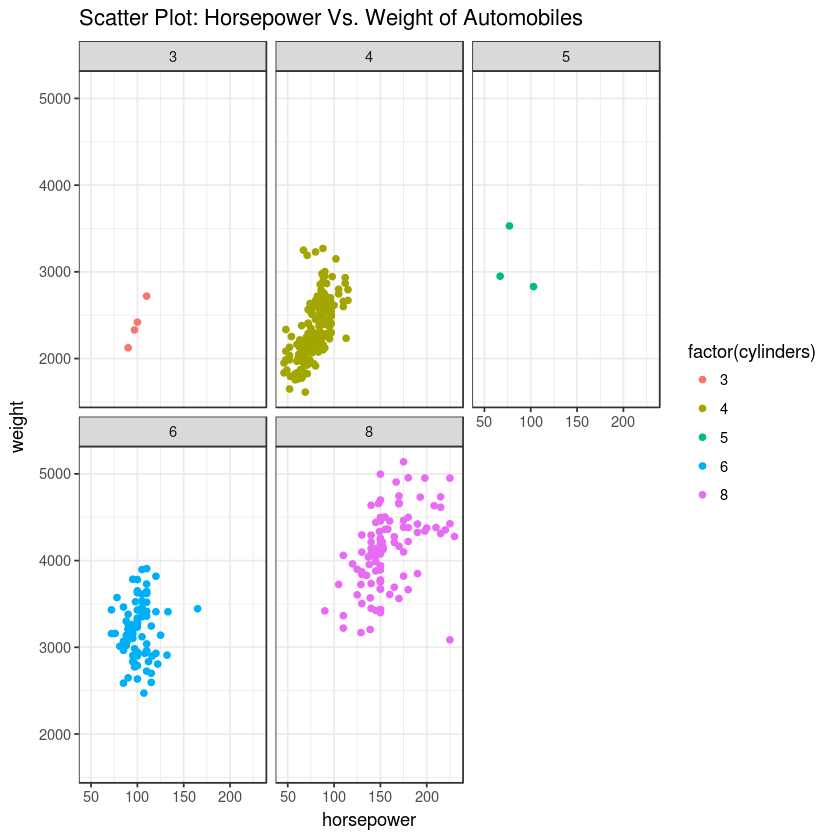

In [25]:
ggplot(data = Auto_dt, # State our data frame
       aes(x = horsepower,
           y = weight)) +  # Choose variables that we will be mapping
geom_point(aes(colour = factor(cylinders))) + # Add color with respect to the cylinder type
facet_wrap(~ cylinders) + 
ggtitle('Scatter Plot: Horsepower Vs. Weight of Automobiles') + # Title
theme_bw() # Switched themes to show significance of facet_wrap

Here we get a better picture of the `cylinders` that are not as common as 4, 6, and 8.  

We can also derive more complicated statistics based visuals that relate to the relationship between the two continuous variables. This sections gets a bit more complicated because there starts to be some analytical concepts, so if you feel as though you are not there yet you can conclude here. 

## Linear Model Approximation

Using our previous example, say we want to build a linear model on these two variables. Fortunate for us, **ggplot2** has some `geom`'s that relate to some statistical inferences. 

Here we show a linear model estimation!


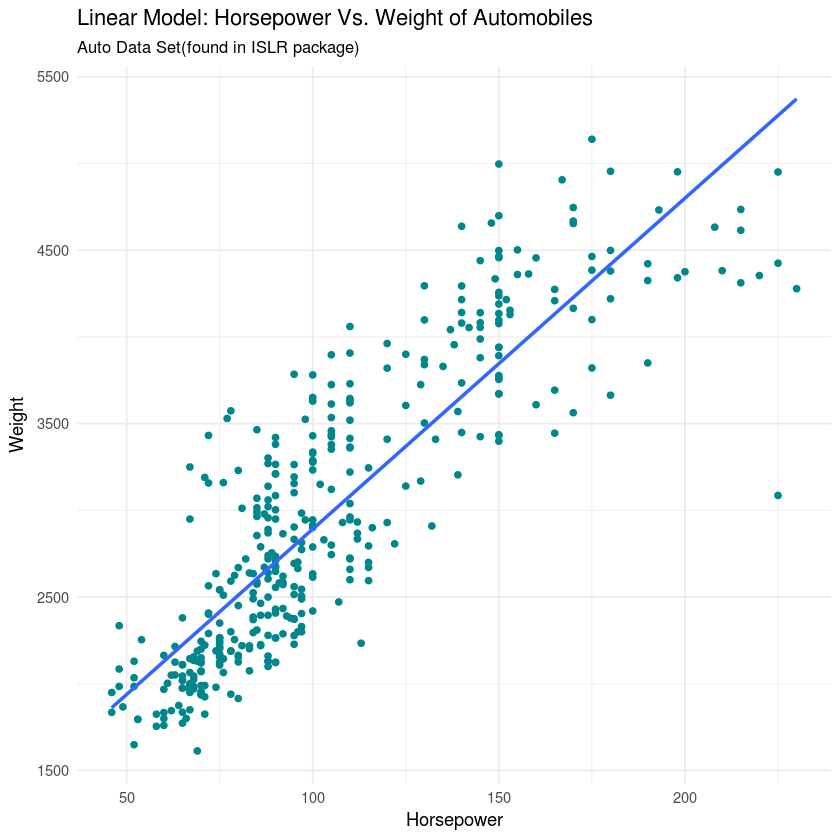

In [26]:
ggplot(data = Auto_dt, # State our data frame
       aes(x = horsepower,
           y = weight)) +  # Choose variables that we will be mapping
geom_point(col = 'turquoise4') + 
geom_smooth(method = 'lm', se = FALSE) + # Linear Model Approximation removed the confidence intervals
ggtitle('Linear Model: Horsepower Vs. Weight of Automobiles', # Title
        subtitle = 'Auto Data Set(found in ISLR package)') + # Subtitle to give more context
labs(x = 'Horsepower', # X label
     y = 'Weight') + # Y label
theme_minimal() # Theme usage

# Conclusion
I will end it right here because I feel as though this is the first step to understanding **ggplot2** I will make other **ggplot2** tutorials going in depth with respect to many other statistcal models including but not limited to:

+ Regression Analysis
+ Time Series
+ Classification Methods

There have been many useful packages that enhance the **ggplot2** experience in these fields which we employ in inertia7. And we encourage you to tranistion to using **ggplot2** as well. 


If you have any questions or want me to display other simple visualizatins feel free to contact me! This is the first iteration so any proofreading is welcomed and encouraged. 

**Note** (Things to add):
+ Box Plot
+ jitter
+ Maybe (?) Pie Charts 